Open in [nbviewer](http://nbviewer.jupyter.org/github/luiarthur/ts_AMS223/blob/master/notes/notes1.ipynb)
$
% Latex definitions
% note: Ctrl-shfit-p for shortcuts menu
\newcommand{\iid}{\overset{iid}{\sim}}
\newcommand{\ind}{\overset{ind}{\sim}}
\newcommand{\p}[1]{\left(#1\right)}
\newcommand{\bk}[1]{\left[#1\right]}
\newcommand{\bc}[1]{ \left\{#1\right\} }
\newcommand{\abs}[1]{ \left|#1\right| }
\newcommand{\norm}[1]{ \left|\left|#1\right|\right| }
\newcommand{\E}{ \text{E} }
\newcommand{\N}{ \mathcal N }
\newcommand{\ds}{ \displaystyle }
\newcommand{\R}{ \mathbb{R} }
\newcommand{\suml}{ \sum_{i=1}^n }
\newcommand{\prodl}{ \prod_{i=1}^n }
\newcommand{\overunderset}[3]{\overset{#1}{\underset{#2}{#3}}}
\newcommand{\asym}{\overset{\cdot}{\sim}}
\newcommand{\given}{\bigg |}
\newcommand{\M}{\mathcal{M}}
\newcommand{\Mult}{\text{Mult}}
\newcommand{\I}{\mathbf{I}}
\newcommand{\F}{\mathbf{F}}
\newcommand{\bphi}{\mathbf{\phi}}
\newcommand{\y}{\mathbf{y}}
$

# Data
- google trends

## Chapter 2 Notes:


**AR(p)**: $~~~~$ $ y_t = \sum_{t=1}^p \phi_j y_{t-j} + \epsilon_t$, for $t=1,2,...$, and where often $\epsilon_t \ind N(0,v)$.

Note that:
- AR(1): $y_t = \phi_1 y_{t-1} + \epsilon_t$
- AR(2): $y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$

We can add a non-zero mean (intercept term) in the following (strange) way:

$y_t = \mu (1-\phi) + \phi y_{t-1} + \epsilon_t$, that is we need to 'difference' the $\mu$ term.

In  linear model form, given the first $p$ observations in an AR(p), 
$p(\y | y_{1:p}) = \N_{T-p}(\y | \F'\bphi,v\I_p)$, where $\y$ is the observations excluing the first $p$ elements.

In [24]:
genAR <- function(n,phi,p=length(phi),sig=1) {
    # generate an ap(p) process with n observations and phi as coefficients
    
    y <- double(n)  
    
    for (i in 1:p) y[i] <- rnorm(1,0,sig)
        
    for (i in (p+1):n) {
        y[i] <- sum(y[(i-1):(i-p)] * phi) + rnorm(1,0,sig)
    }
        
    y
}

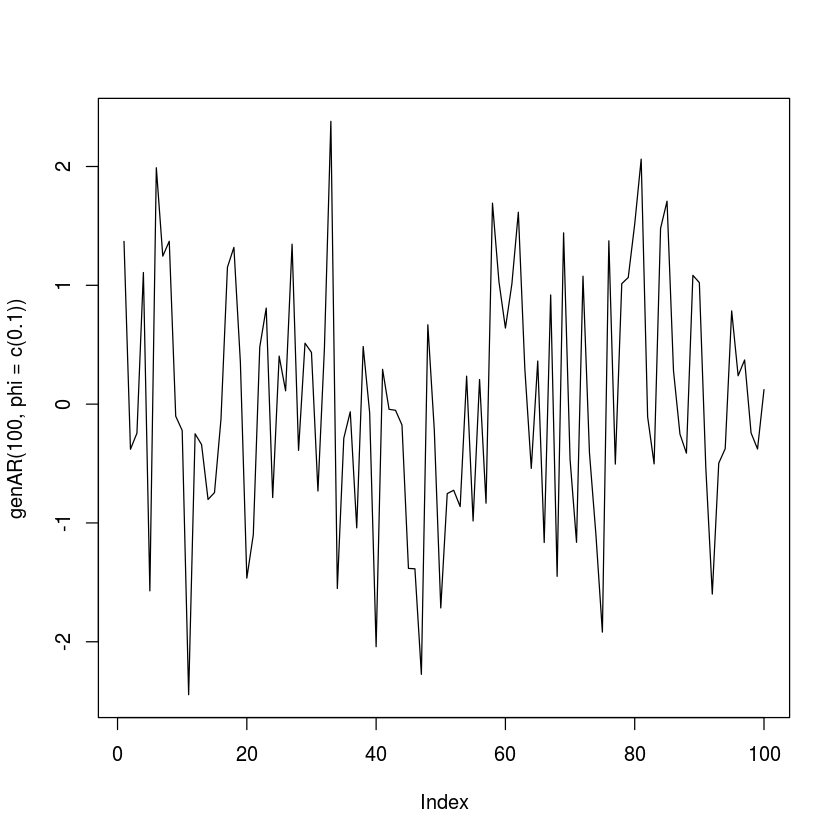

In [23]:
plot(genAR(100,phi=c(.1)),type='l')

# Causal models

The model is called causal because it does not depend on future observations.
There are cases of AR(1) process with $\abs{\phi} > 1$ . But, not causal. Therefore, can't be used in forecasting, and not used in practice.